<a href="https://colab.research.google.com/github/Avaniharetlia/MLPROJECTS/blob/main/Stockmarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stock_data.csv to stock_data (1).csv


In [ ]:
df = pd.read_csv('/content/stock_data.csv')

In [ ]:
print("First 5 rows of data:")
print(df.head())

First 5 rows of data:
       Open     Close      High       Low    Volume       RSI      MACD  \
0  0.374639  0.374780  0.373510  0.378390  0.298909  0.847286  0.741715   
1  0.950982  0.937746  0.938422  0.946158  0.094805  0.494543  0.881343   
2  0.732198  0.719825  0.723644  0.723158  0.126348  0.195471  0.463179   
3  0.598823  0.599865  0.596973  0.605322  0.180662  0.736684  0.289076   
4  0.156053  0.163410  0.155891  0.166084  0.203646  0.418698  0.318761   

   Bollinger_Upper  Bollinger_Lower  Sentiment_Score  GDP_Growth  \
0         0.367146         0.366420         0.877177    0.580868   
1         0.938396         0.935640         0.907192    0.527044   
2         0.710666         0.702300         0.378363    0.351052   
3         0.593793         0.586936         0.231614    0.493274   
4         0.164158         0.156355         0.191642    0.365116   

   Inflation_Rate  Target  
0        0.038604       0  
1        0.108908       0  
2        0.432540       0  
3     

In [ ]:
print("\nColumn Names:")
print(df.columns)


Column Names:
Index(['Open', 'Close', 'High', 'Low', 'Volume', 'RSI', 'MACD',
       'Bollinger_Upper', 'Bollinger_Lower', 'Sentiment_Score', 'GDP_Growth',
       'Inflation_Rate', 'Target'],
      dtype='object')


In [ ]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df['Days'] = (df['Date'] - df['Date'].min()).dt.days
    X = df[['Days']]
else:
    # If no Date, just use index
    df = df.reset_index()
    X = df[['index']]

In [ ]:
y = df['Close']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.07893753670694192
R² Score: -0.0008454862008759889


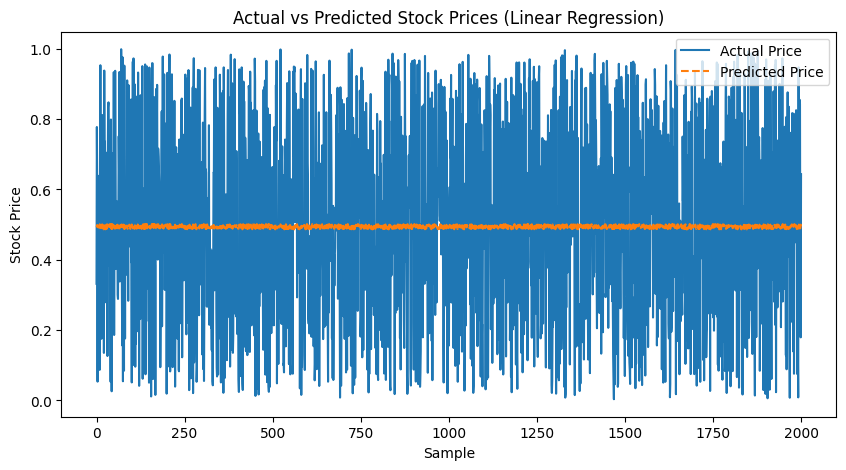

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Price')
plt.plot(y_pred, label='Predicted Price', linestyle='--')
plt.title("Actual vs Predicted Stock Prices (Linear Regression)")
plt.xlabel("Sample")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [ ]:
last_day = X['Days'].max() if 'Days' in X.columns else X['index'].max()
future_day = [[last_day + 1]]  # Predicting next day
future_price = model.predict(future_day)
print(f"\nPredicted stock price for next day: {future_price[0]}")


Predicted stock price for next day: 0.48652272580174344


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:

current_day = last_day
current_day_input = [[current_day]]
current_day_price = model.predict(current_day_input)
print(f"\nPredicted stock price for current/latest day: {current_day_price[0]}")



Predicted stock price for current/latest day: 0.48652421502776205


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
future_day = [[last_day + 1]]
future_price = model.predict(future_day)
print(f"Predicted stock price for next day: {future_price[0]}")


Predicted stock price for next day: 0.48652272580174344


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
